<a href="https://colab.research.google.com/github/skywalker290/Image-Classification-Model/blob/main/CNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras


In [100]:
(x_train,y_train),(x_test,y_test)=keras .datasets.fashion_mnist.load_data()

In [101]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [102]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [103]:
class_labels=['T-shirt/top','Trouser','Pullover','Dress','coat','sandal','shirt','sneakers','bag','ankle boot']

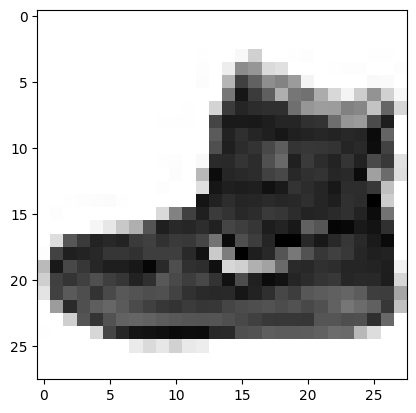

In [104]:
plt.imshow(x_train[0],cmap='Greys')

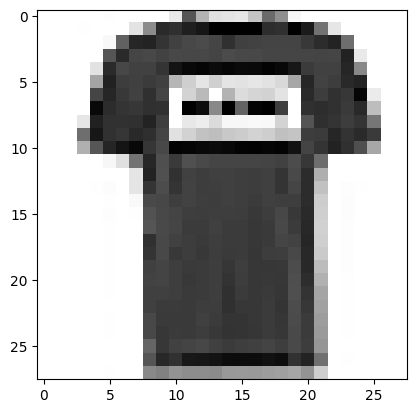

In [105]:
plt.imshow(x_train[1],cmap='Greys')

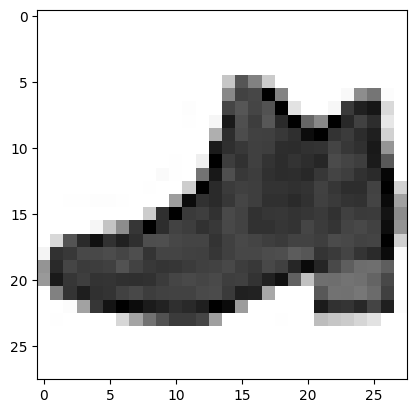

In [106]:
plt.imshow(x_train[15],cmap='Greys')

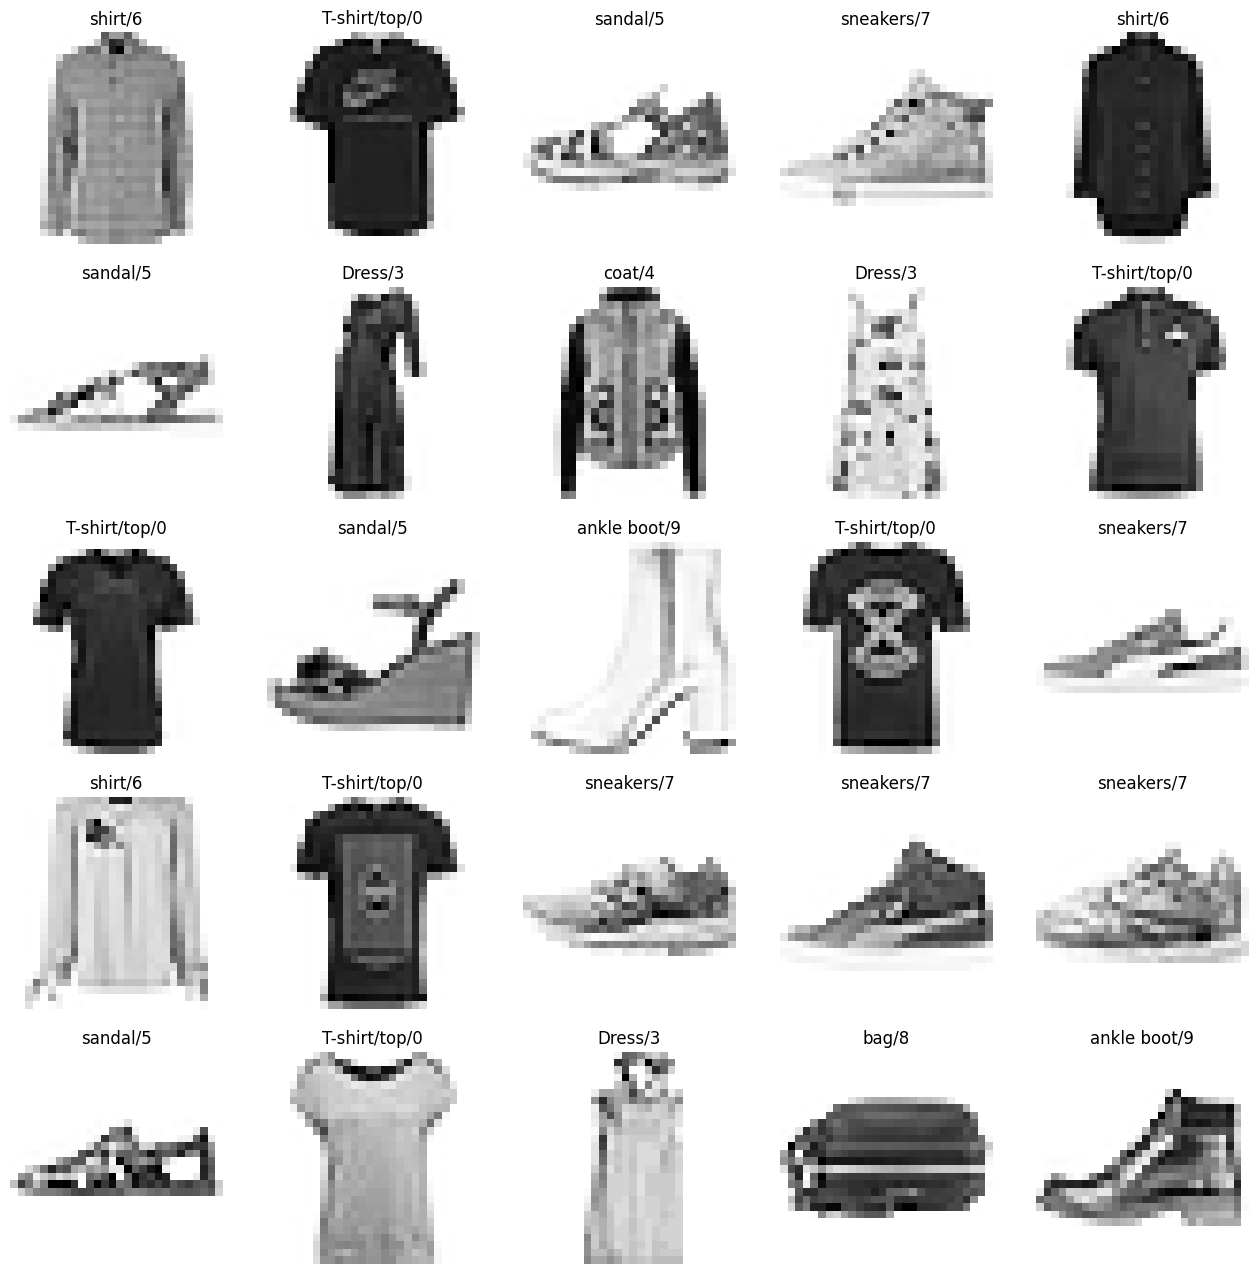

In [107]:
plt.figure(figsize=(16,16))
j=1

for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [108]:
x_train.ndim
y_train.shape

(60000,)

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


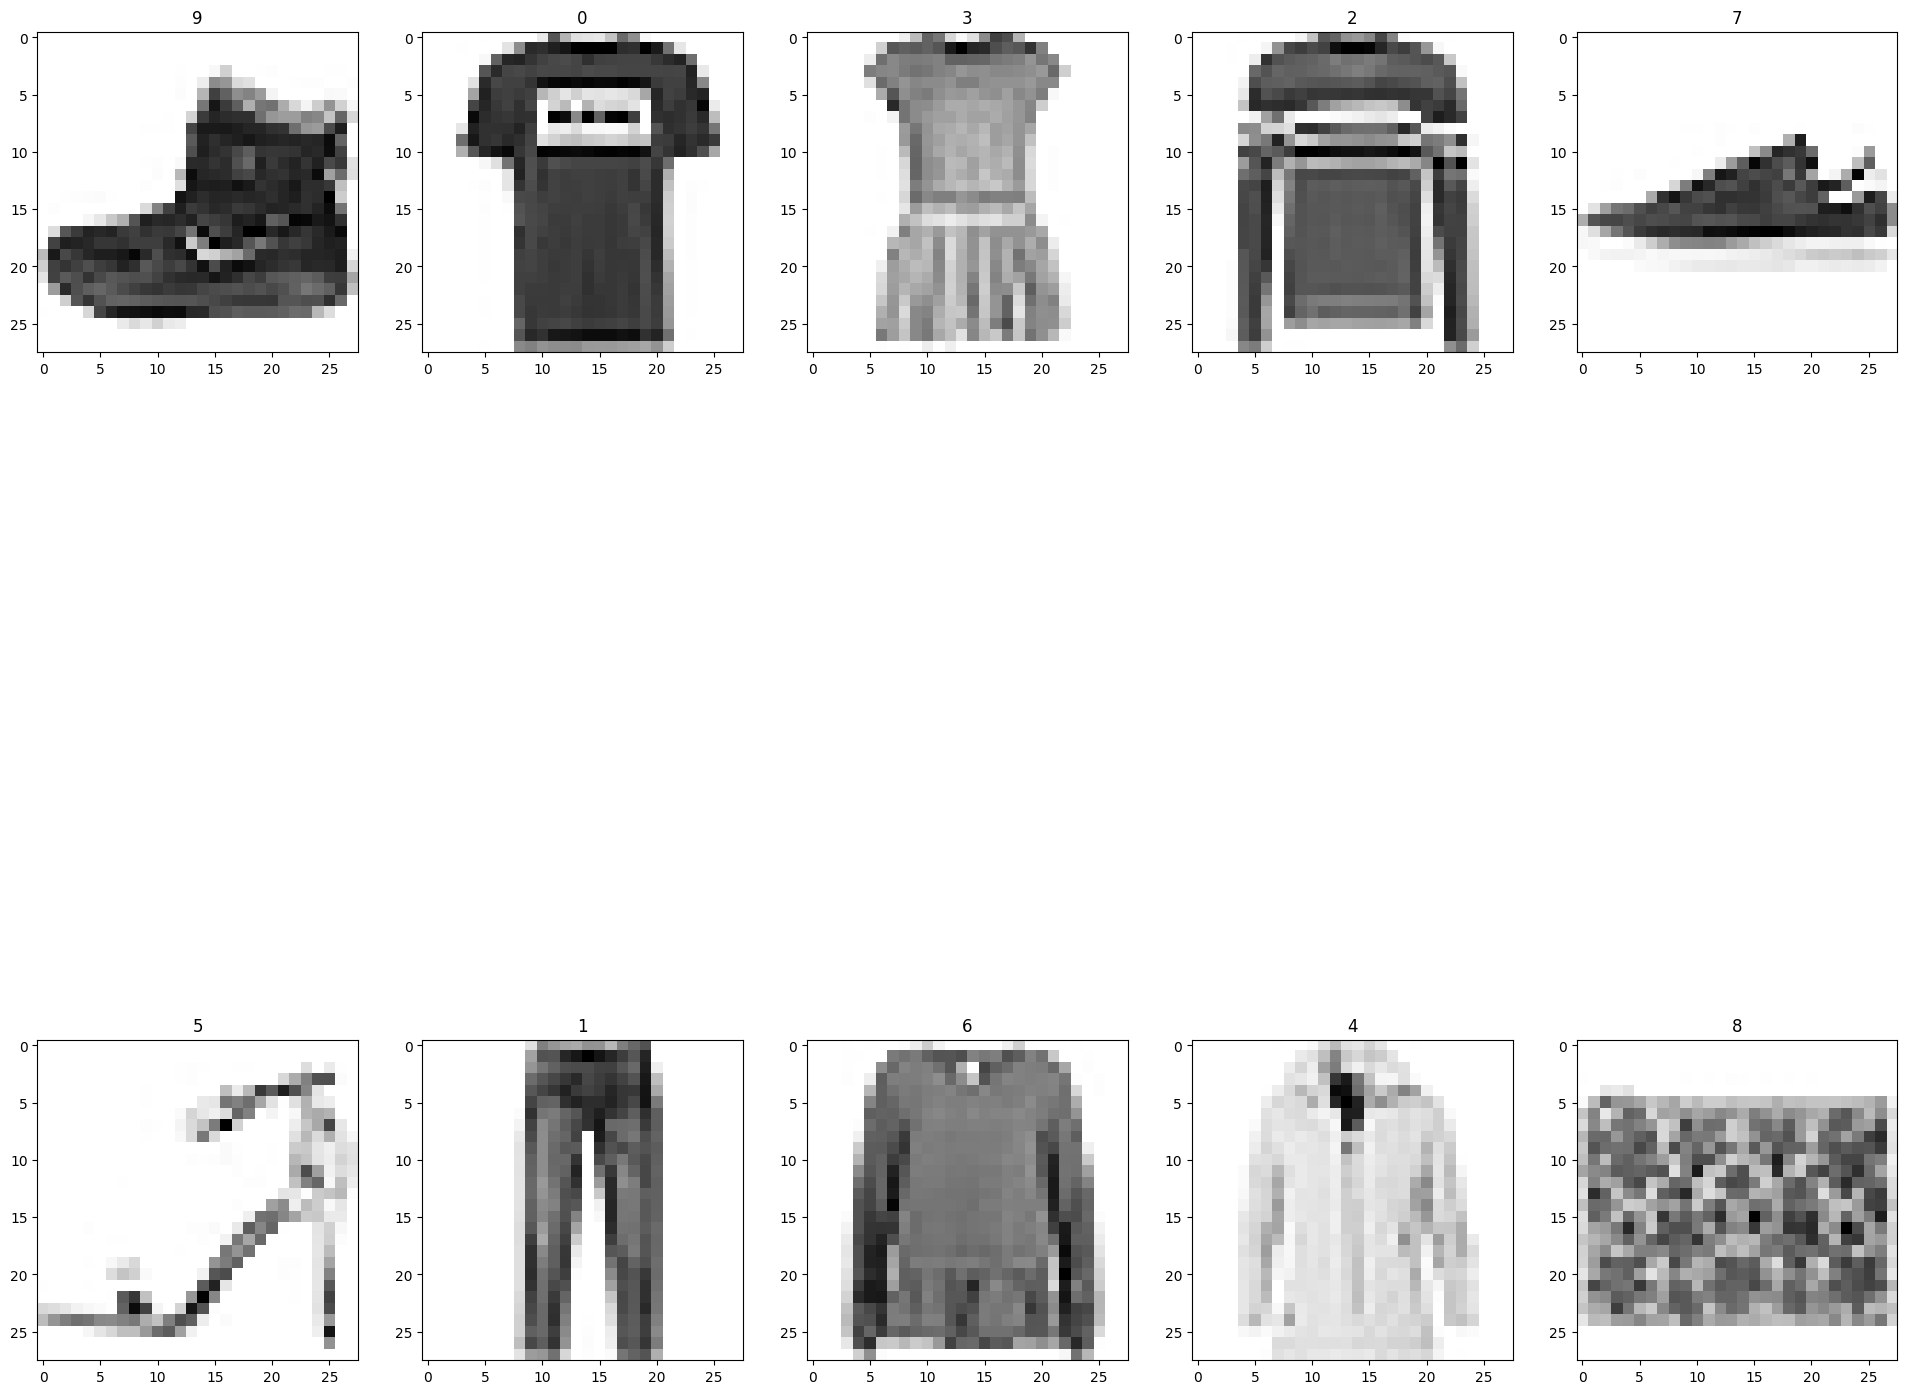

In [109]:
fashionMNIST=keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test)= fashionMNIST.load_data()
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
eil = np.array(pd.unique(y_train))
eindex1=[]
print(eil)

for i in eil:
  eindex1.append(list(y_train).index(i))
print(eindex1)

plt.figure(figsize=(24,24))
for x,y in enumerate(eindex1):
  print(x_train[y].shape)
  plt.subplot(2,5,x+1)
  plt.imshow(tensorflow.squeeze(x_train[y]),cmap='Greys')
  plt.title('{}'.format(eil[x]))

In [110]:
x_train.ndim

4

In [111]:
x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000,))

In [112]:
# x_train =np.expand_dims(x_train,-1)
# x_test= np.expand_dims(x_test,-1)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


Feature scalling

In [113]:
x_train = x_train/255;
x_test = x_test/255;

In [114]:
x_train.shape,y_train.shape

((60000, 28, 28, 1, 1), (60000,))

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [116]:
x_train.shape,y_train.shape

((48000, 28, 28, 1, 1), (48000,))

In [117]:
x_val.shape,y_val.shape

((12000, 28, 28, 1, 1), (12000,))

In [119]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=10, activation='softmax')
])


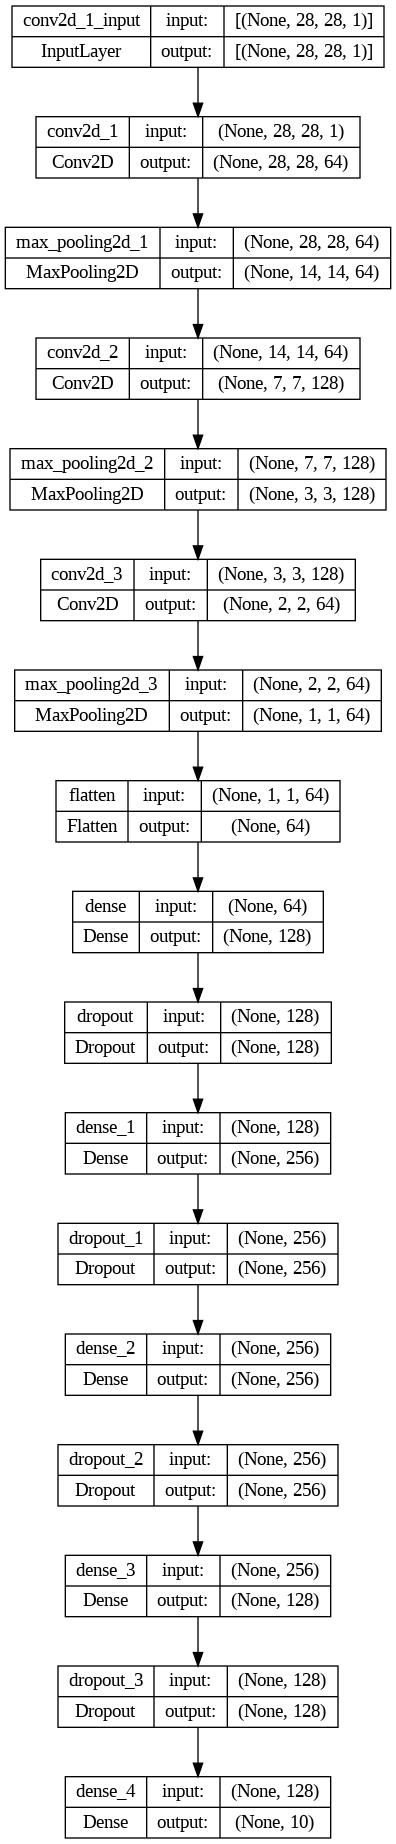

In [122]:
keras.utils.plot_model(model,to_file='modelplot.png',show_shapes=True, show_layer_names =True)

In [124]:
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0

In [126]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
model.fit(x_train,y_train,epochs=20,batch_size=512, verbose=1,validation_data=(x_val,y_val))

Epoch 1/20
94/94 [==============================] - 86s 884ms/step - loss: 1.1891 - accuracy: 0.5364 - val_loss: 0.5954 - val_accuracy: 0.7620
Epoch 2/20
94/94 [==============================] - 75s 796ms/step - loss: 0.5809 - accuracy: 0.7796 - val_loss: 0.4588 - val_accuracy: 0.8337
Epoch 3/20
94/94 [==============================] - 79s 847ms/step - loss: 0.4685 - accuracy: 0.8314 - val_loss: 0.4474 - val_accuracy: 0.8363
Epoch 4/20
94/94 [==============================] - 74s 793ms/step - loss: 0.4020 - accuracy: 0.8582 - val_loss: 0.3559 - val_accuracy: 0.8740
Epoch 5/20
94/94 [==============================] - 76s 808ms/step - loss: 0.3562 - accuracy: 0.8739 - val_loss: 0.3279 - val_accuracy: 0.8838
Epoch 6/20
94/94 [==============================] - 80s 850ms/step - loss: 0.3238 - accuracy: 0.8864 - val_loss: 0.3046 - val_accuracy: 0.8904
Epoch 7/20
94/94 [==============================] - 75s 803ms/step - loss: 0.2998 - accuracy: 0.8940 - val_loss: 0.2940 - val_accuracy: 0.8967

In [133]:
model.predict(np.expand_dims(x_test[0],axis=0)).round(2)

1/1 [==============================] - 1s 848ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [138]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 41ms/step


9

In [139]:
y_test[0]

9

In [141]:
y_pred= model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 6s 18ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.83, 0.  , 0.  ]], dtype=float32)

In [143]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.2755 - accuracy: 0.9084


[0.27546682953834534, 0.9083999991416931]

In [152]:
!pip install scikit-learn


<Axes: >

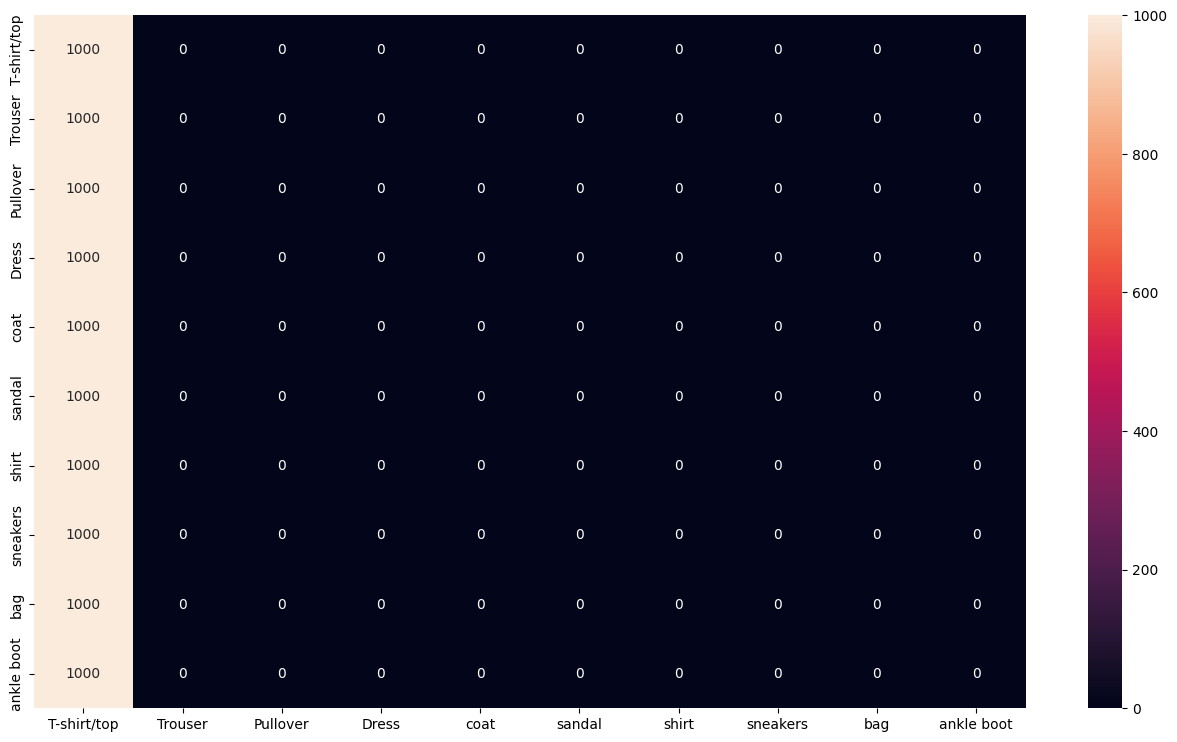

In [156]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))

y_pred_labels=[np.argmax(label) for label in y_pred ]
cm=confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels=class_labels, yticklabels=class_labels)

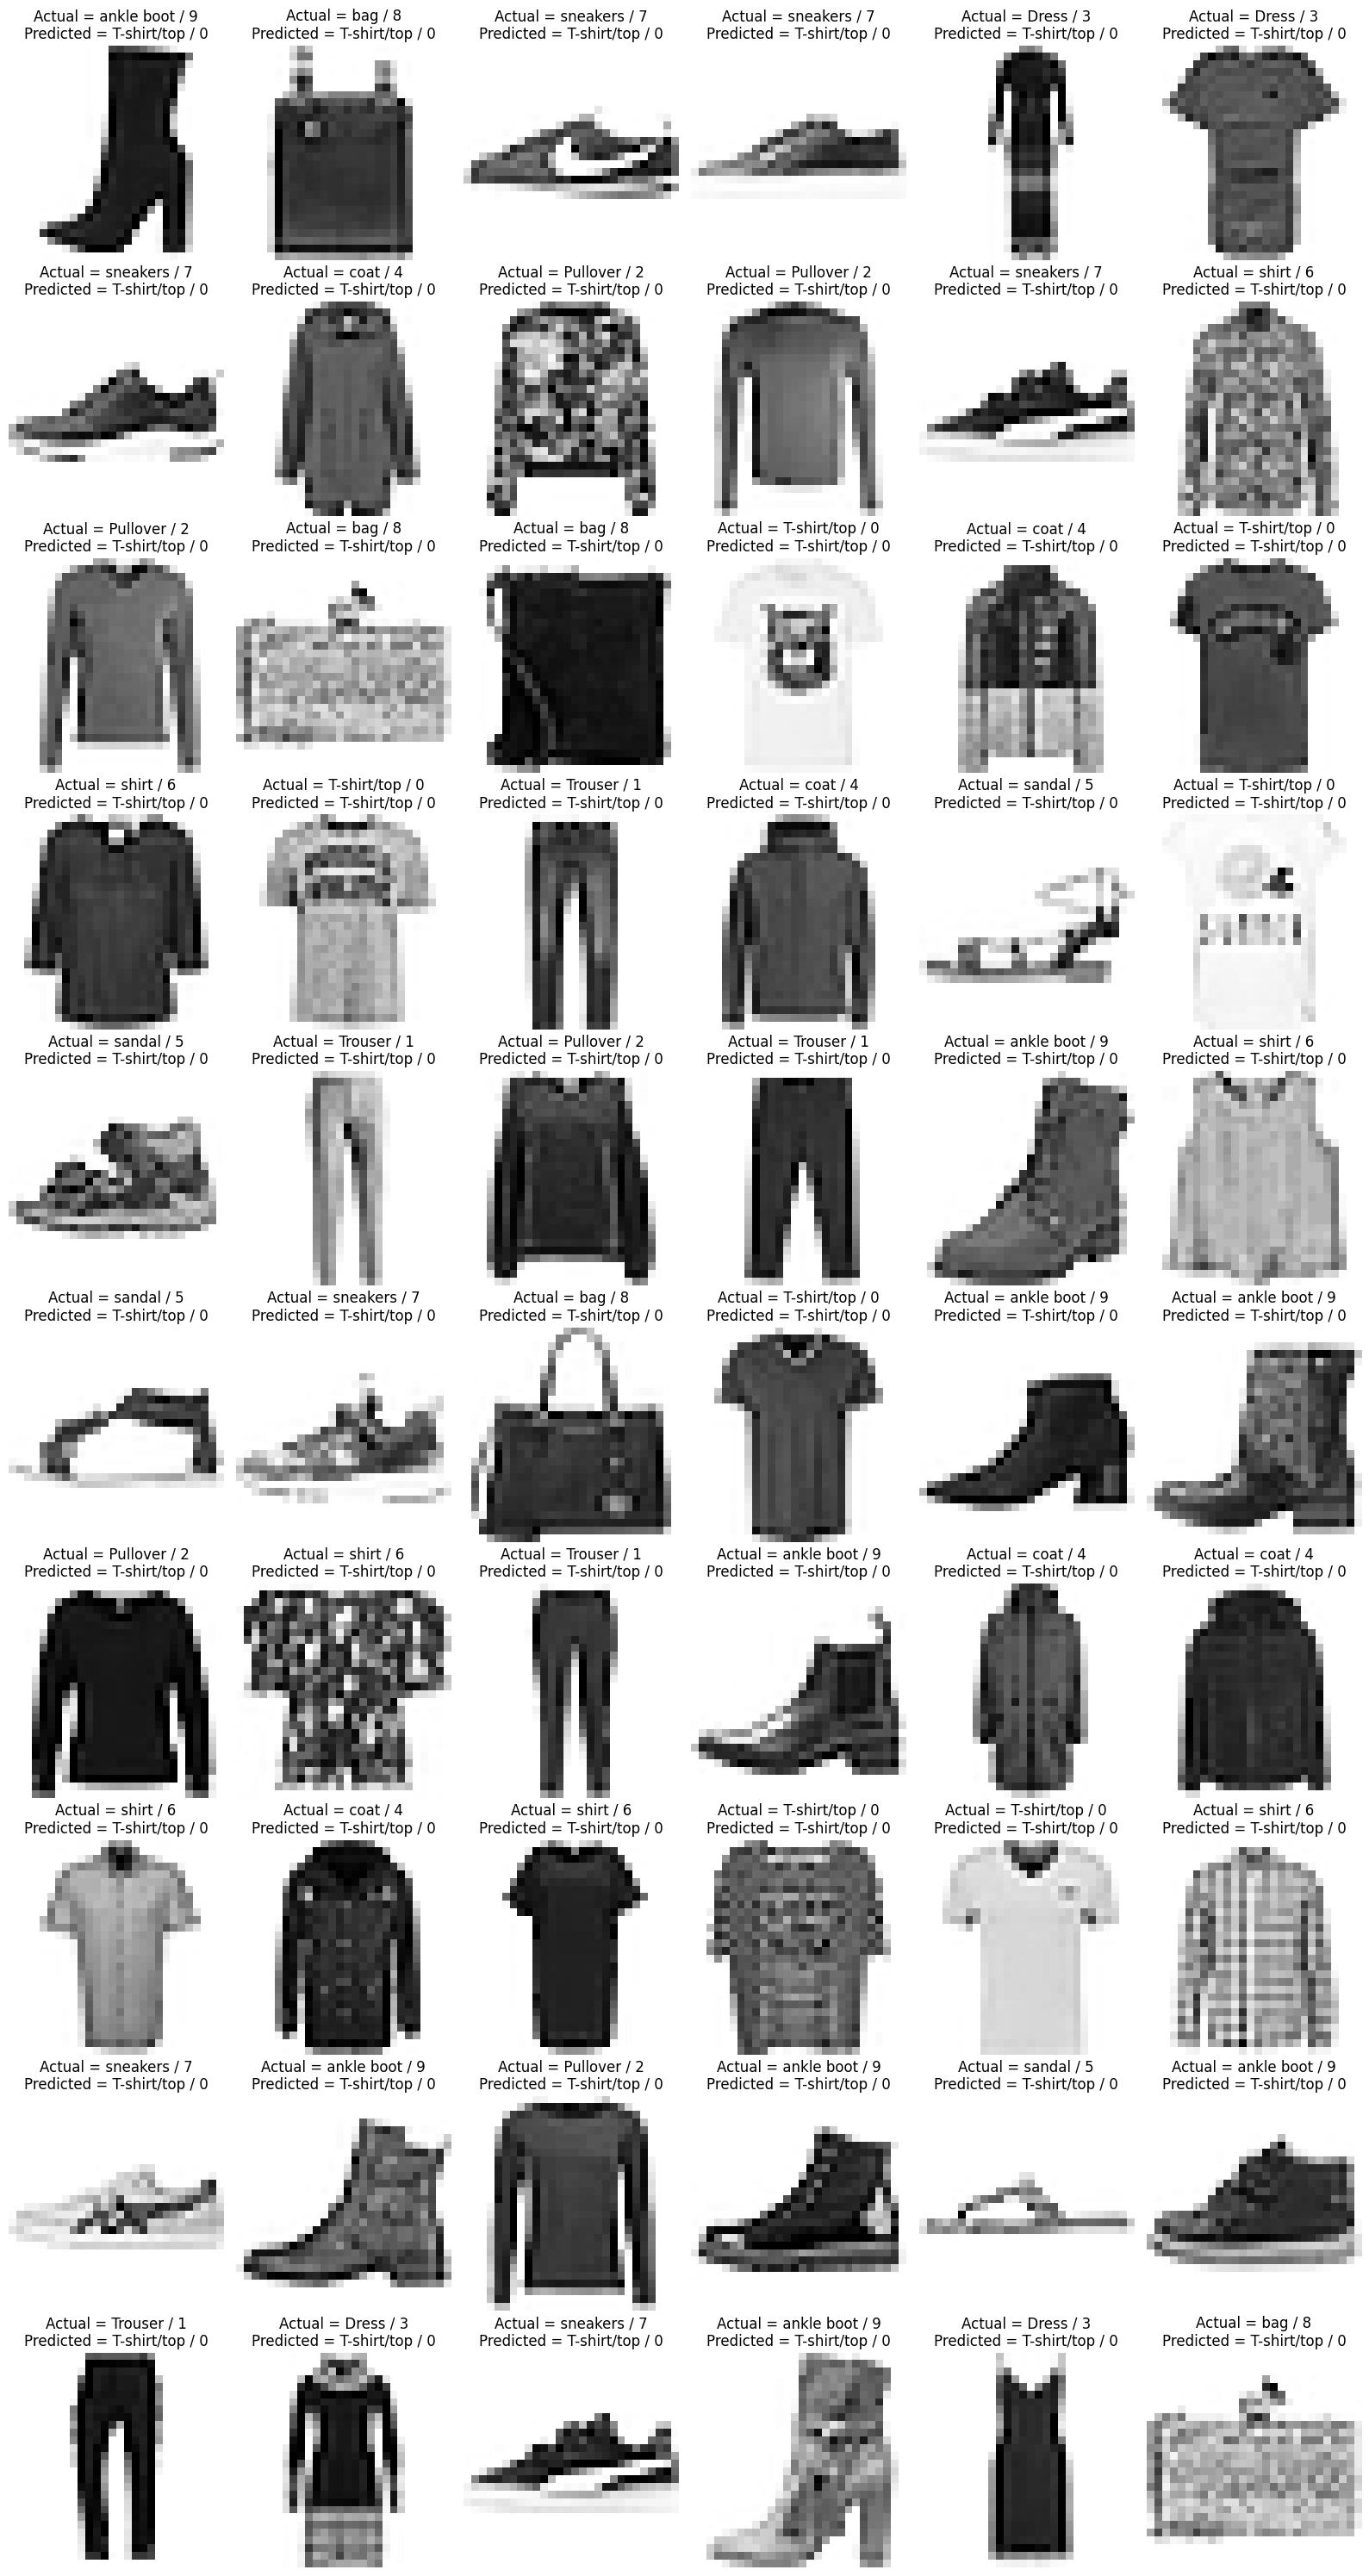

In [161]:
plt.figure(figsize=(16, 30))
j = 1

for i in np.random.randint(0, 1000, 60):
    plt.subplot(10, 6, j)
    j += 1  # Increment j within the loop
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    plt.axis('off')
    true_label = class_labels[y_test[i]]
    predicted_label = class_labels[np.argmax(y_pred[i])]
    plt.title('Actual = {} / {}\nPredicted = {} / {}'.format(true_label, y_test[i], predicted_label, np.argmax(y_pred[i])))

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


IndexError: ignored

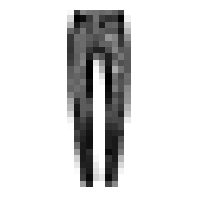

In [164]:
 plt.figure(figsize= (16,30))
 j=1

 for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted={}/ {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])]))
